In [97]:
import numpy as np
from matplotlib import pyplot as plt
from kcm.koopman_category_model import KoopmanCategoryModel
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

In [ ]:
num_cats=5
num_samples=100
system_dimension=1
data_path = Path(r"C:\Users\peterdb1\Documents\Masters in ACM\(i-j) 625.801-802 - ACM Master's Research\Technical Work\data\1-dimensional-systems\dataset_5_class_100_samples_large.pkl")
delay_embeddings=100
num_segments=5
q=2
num_clusters=None
seed=42
KCM = KoopmanCategoryModel(num_cats=num_cats,
                           num_samples=num_samples,
                           system_dimension=system_dimension,
                           data_path=data_path,
                           delay_embeddings=delay_embeddings,
                           num_segments=num_segments,
                           q=q,
                           num_clusters=num_clusters,
                           seed=seed)

KCM.generate_data()

In [101]:
cat = 4
sample = 0


category = list(KCM.dataset.keys())[cat]
y = KCM.dataset[category][sample]['y']
t = KCM.dataset[category][sample]['t']
start = (num_samples * num_segments) * cat + num_segments * sample
inds = np.arange(start,start+num_segments)

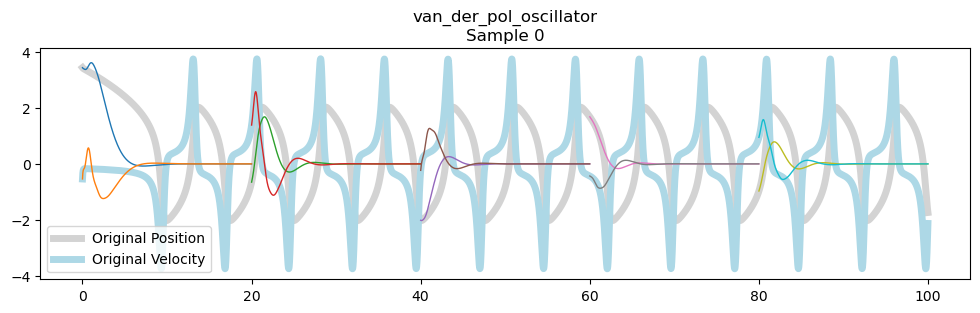

In [102]:
plt.figure(figsize=(12,3))

plt.plot(t,y[0,:],linewidth=5,color='lightgray',label='Original Position')
plt.plot(t,y[1,:],linewidth=5,color='lightblue',label='Original Velocity')


for i, ind in enumerate(inds):

    eigs = KCM.all_eigs[ind]
    b = KCM.all_amps[ind]
    modes = KCM.all_modes[ind]
    n = KCM.n
    
    eig_matrix = np.vstack([eigs**i for i in range(KCM.segment_length)]).T
    Y_reconstructed = (modes @ np.diag(b) @ eig_matrix).real

    s = KCM.segment_length * i
    plt.plot(t[s:s+KCM.segment_length],Y_reconstructed[0,:],linewidth=1,label=f'Seg. {i+1} Position')
    plt.plot(t[s:s+KCM.segment_length],Y_reconstructed[1,:],linewidth=1,label=f'Seg. {i+1} Velocity')

plt.title(f'{category}\nSample {sample}')
plt.legend(['Original Position','Original Velocity'])
plt.show()